# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
!kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
!unzip bus-breakdown-and-delays.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays
License(s): unknown
  0% 0.00/4.75M [00:00<?, ?B/s]
100% 4.75M/4.75M [00:00<00:00, 155MB/s]
Archive:  bus-breakdown-and-delays.zip
  inflating: Bus_Breakdown_and_Delays.csv  


## Importing Libraries

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [3]:
df = pd.read_csv('Bus_Breakdown_and_Delays.csv')
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [27]:
df.tail()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,"G.V.C., LTD.",20 MINS,7,Yes,Yes,No,04/05/2017 08:10:00 AM,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,"G.V.C., LTD.",20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,G.V.C. LTD. (B2192),20 MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,LITTLE RICHIE BUS SERVICE,20 MINS,0,Yes,Yes,No,05/25/2017 04:30:00 PM,05/25/2017 04:30:07 PM,Breakdown,School-Age
147971,2016-2017,1353046,Project Read PM Run,2530,K617,Other,21436,05/25/2017 04:36:00 PM,05/25/2017 04:37:00 PM,Brooklyn,"RELIANT TRANS, INC. (B232",20 MINS,7,Yes,Yes,Yes,05/25/2017 04:37:00 PM,05/25/2017 04:37:37 PM,Running Late,School-Age


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype          
---  ------                           --------------   -----          
 0   Busbreakdown_ID                  147972 non-null  int64          
 1   Run_Type                         147972 non-null  object         
 2   Bus_No                           147972 non-null  object         
 3   Route_Number                     147972 non-null  object         
 4   Reason                           147972 non-null  object         
 5   Schools_Serviced                 147972 non-null  object         
 6   Occurred_On                      147972 non-null  timedelta64[ns]
 7   Created_On                       147972 non-null  timedelta64[ns]
 8   Boro                             147972 non-null  object         
 9   Bus_Company_Name                 147972 non-null  object         
 10  How_Long_Delayed                

In [5]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [30]:
print(df['Breakdown_or_Running_Late'].value_counts())

Breakdown_or_Running_Late
Running Late    130857
Breakdown        17115
Name: count, dtype: int64


In [46]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


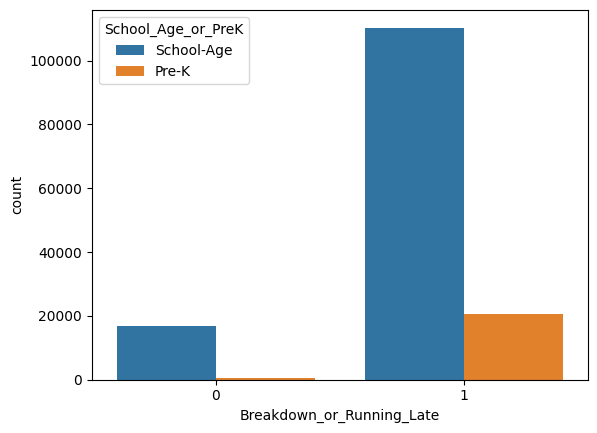

In [82]:
sns.countplot(x='Breakdown_or_Running_Late',data=df,hue='School_Age_or_PreK')
plt.show()

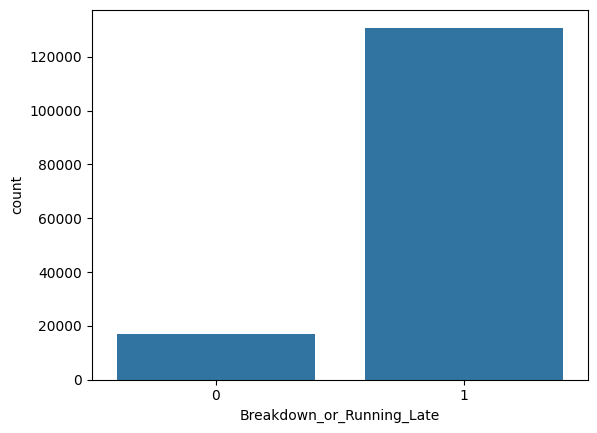

In [57]:
sns.countplot(x='Breakdown_or_Running_Late', data=df)
plt.show()

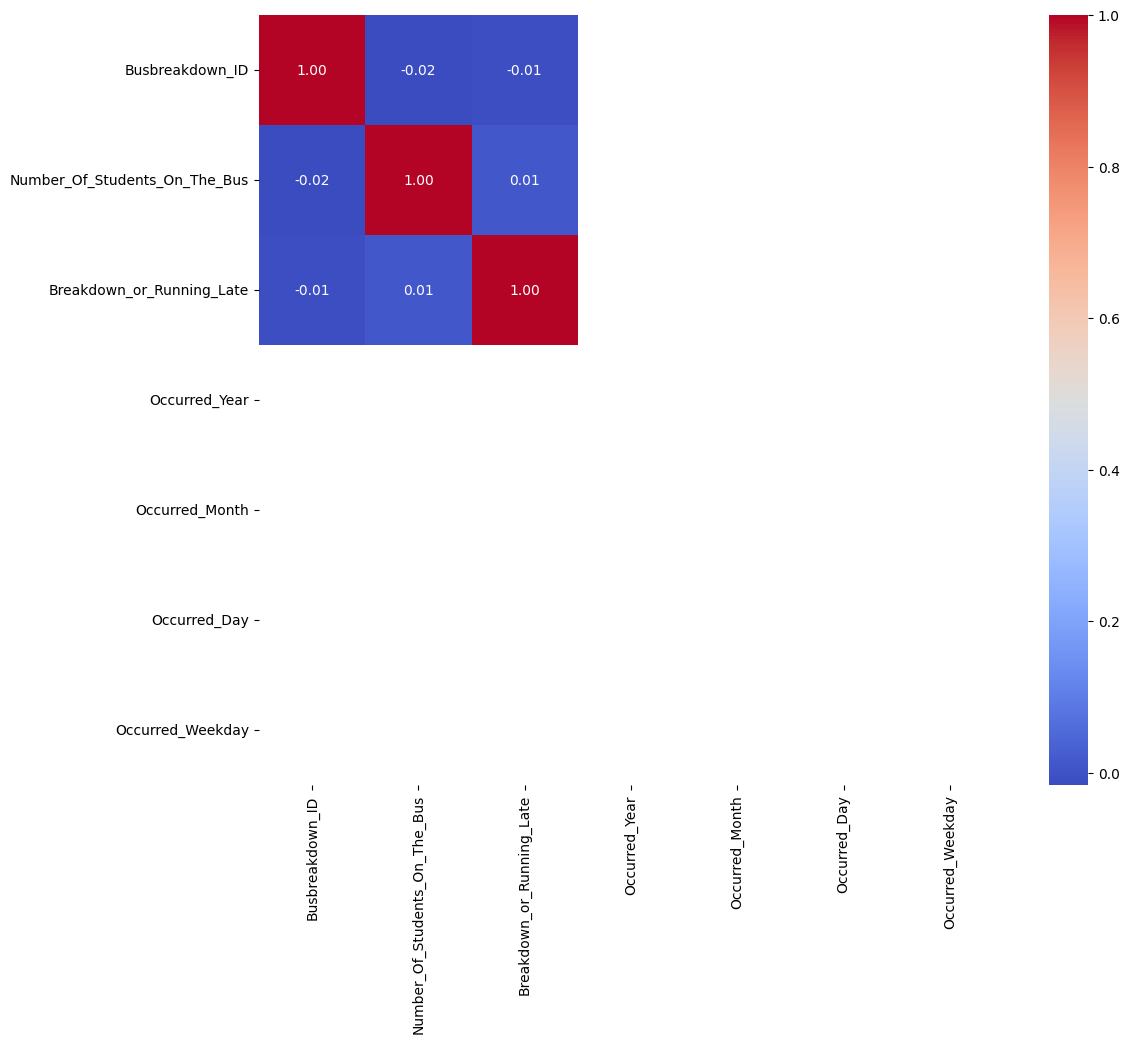

Busbreakdown_ID                 -0.009859
Number_Of_Students_On_The_Bus    0.007790
Breakdown_or_Running_Late        1.000000
Occurred_Year                         NaN
Occurred_Month                        NaN
Occurred_Day                          NaN
Occurred_Weekday                      NaN
Name: Breakdown_or_Running_Late, dtype: float64


In [78]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

print(correlation_matrix['Breakdown_or_Running_Late'])

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

Handle Missing Values

In [7]:
df['Incident_Number'].unique()

array([nan, '2725956', '2776550', ..., '90330033', '90333015', '90323827'],
      dtype=object)

In [8]:
df.drop('Incident_Number', axis=1, inplace=True)

In [71]:
df.drop('School_Year', axis=1, inplace=True)

In [10]:
df['How_Long_Delayed'].unique()

array(['10MINUTES', '25 MINUTES', '15 MINUTES', ..., '40 -50 MIN',
       '80 MIN', '45 MINIUTE'], dtype=object)

In [16]:
df['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('minutes', '')


In [24]:
df['How_Long_Delayed']=df['How_Long_Delayed'].fillna(df['How_Long_Delayed'].mode()[0])

In [28]:
df['Run_Type']=df['Run_Type'].fillna(df['Run_Type'].mode()[0])

In [31]:
df['Route_Number'].unique()

array(['1', '2', 'P640', ..., '012', '29AM', '1409B'], dtype=object)

In [34]:
df['Route_Number']=df['Route_Number'].fillna(df['Route_Number'].mode()[0])

In [32]:
df['Reason'].unique()

array(['Other', 'Heavy Traffic', 'Flat Tire', 'Mechanical Problem',
       'Delayed by School', 'Problem Run', 'Late return from Field Trip',
       'Won`t Start', 'Weather Conditions', 'Accident', nan], dtype=object)

In [35]:
df['Reason']=df['Reason'].fillna(df['Reason'].mode()[0])

In [33]:
df['Boro'].unique()

array(['Bronx', nan, 'Queens', 'Brooklyn', 'Nassau County', 'Manhattan',
       'Westchester', 'Staten Island', 'All Boroughs', 'Rockland County',
       'Connecticut', 'New Jersey'], dtype=object)

In [36]:
df['Boro']=df['Boro'].fillna(df['Boro'].mode()[0])

In [37]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


Encode Categorical Variables

In [40]:
# Define categorical and numerical features
categorical_features = [
    'Run_Type', 'Reason', 'Schools_Serviced', 'Boro', 'Bus_Company_Name',
    'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
    'Have_You_Alerted_OPT', 'School_Age_or_PreK'
]
numerical_features = ['Number_Of_Students_On_The_Bus']

# Label encode target variable
label_encoder = LabelEncoder()
df['Breakdown_or_Running_Late'] = label_encoder.fit_transform(df['Breakdown_or_Running_Late'])


In [144]:
label_encoder.classes_

array(['Breakdown', 'Running Late'], dtype=object)

Scale and Normalize Data

In [44]:
# Standardize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print(df.head())

  School_Year  Busbreakdown_ID  Run_Type Bus_No Route_Number         Reason  \
0   2015-2016          1224901  Pre-K/EI    811            1          Other   
1   2015-2016          1225098  Pre-K/EI   9302            1  Heavy Traffic   
2   2015-2016          1215800  Pre-K/EI    358            2  Heavy Traffic   
3   2015-2016          1215511  Pre-K/EI    331            2          Other   
4   2015-2016          1215828  Pre-K/EI    332            2          Other   

  Schools_Serviced             Occurred_On              Created_On   Boro  \
0             C353  10/26/2015 08:30:00 AM  10/26/2015 08:40:00 AM  Bronx   
1             C814  10/27/2015 07:10:00 AM  10/27/2015 07:11:00 AM  Bronx   
2             C195  09/18/2015 07:36:00 AM  09/18/2015 07:38:00 AM  Bronx   
3             C178  09/17/2015 08:08:00 AM  09/17/2015 08:12:00 AM  Bronx   
4             S176  09/18/2015 07:39:00 AM  09/18/2015 07:45:00 AM  Bronx   

  Bus_Company_Name How_Long_Delayed  Number_Of_Students_On_The

Handle Imbalanced Data

In [133]:
undersample = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)
print(pd.Series(y_resampled).value_counts())


Breakdown_or_Running_Late
0    12046
1    12046
Name: count, dtype: int64


Handle Outliers

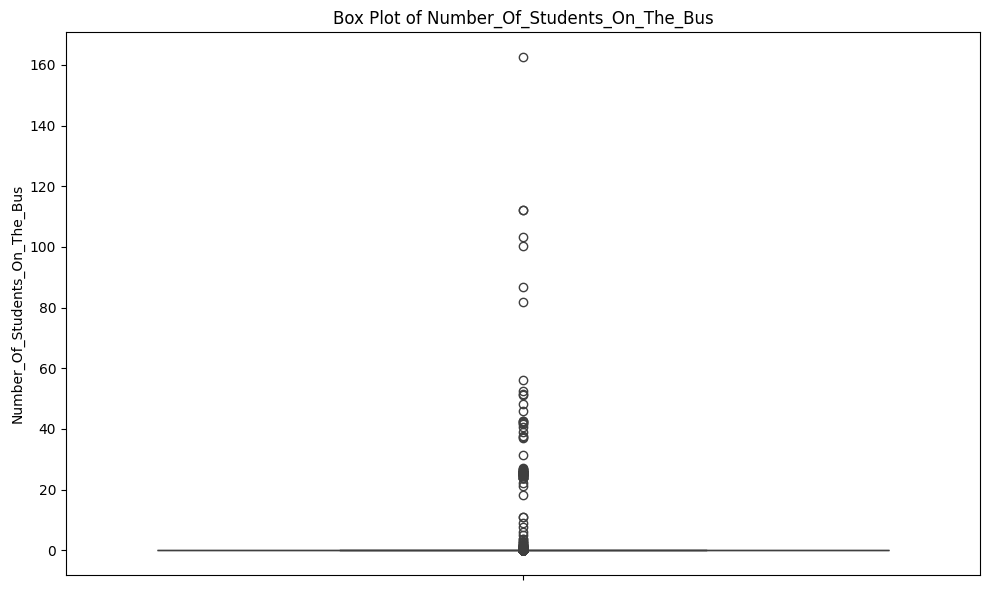

In [134]:
plt.figure(figsize=(10, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i+1)
    sns.boxplot(df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


In [63]:
Q1 = df['Number_Of_Students_On_The_Bus'].quantile(0.25)
Q3 = df['Number_Of_Students_On_The_Bus'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Number_Of_Students_On_The_Bus'] < lower_bound) | (df['Number_Of_Students_On_The_Bus'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 7674


## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [109]:
# Define features and target
X = df.drop(columns=['Breakdown_or_Running_Late'])
y = df['Breakdown_or_Running_Late']

# Train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
def build_ann_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    return model

model = build_ann_model(X_train.shape[1])
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


In [111]:
def build_ann_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    return model




In [113]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │           1,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [130]:
from sklearn.preprocessing import LabelEncoder

# Assuming X_train is a pandas DataFrame
# Convert timedelta columns to numerical representations (e.g., total seconds)
for col in X_train.columns:
    if pd.api.types.is_timedelta64_dtype(X_train[col]):
        X_train[col] = X_train[col].dt.total_seconds()
    # Handle string (object) columns using Label Encoding
    elif X_train[col].dtype == 'object':
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])

# Now proceed with model fitting
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

Epoch 1/20
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8837 - loss: 0.3675 - val_accuracy: 0.8869 - val_loss: 0.3531
Epoch 2/20
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8827 - loss: 0.3626 - val_accuracy: 0.8869 - val_loss: 0.3531
Epoch 3/20
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8836 - loss: 0.3760 - val_accuracy: 0.8869 - val_loss: 0.3532
Epoch 4/20
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8824 - loss: 0.3979 - val_accuracy: 0.8869 - val_loss: 0.3531
Epoch 5/20
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8857 - loss: 0.4079 - val_accuracy: 0.8869 - val_loss: 0.3533


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [131]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [145]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

694/694 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8881 - loss: 0.3506
Test Loss: 0.3525
Test Accuracy: 0.8871


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [146]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


694/694 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
[[    0  2505]
 [    0 19691]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2505
           1       0.89      1.00      0.94     19691

    accuracy                           0.89     22196
   macro avg       0.44      0.50      0.47     22196
weighted avg       0.79      0.89      0.83     22196



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

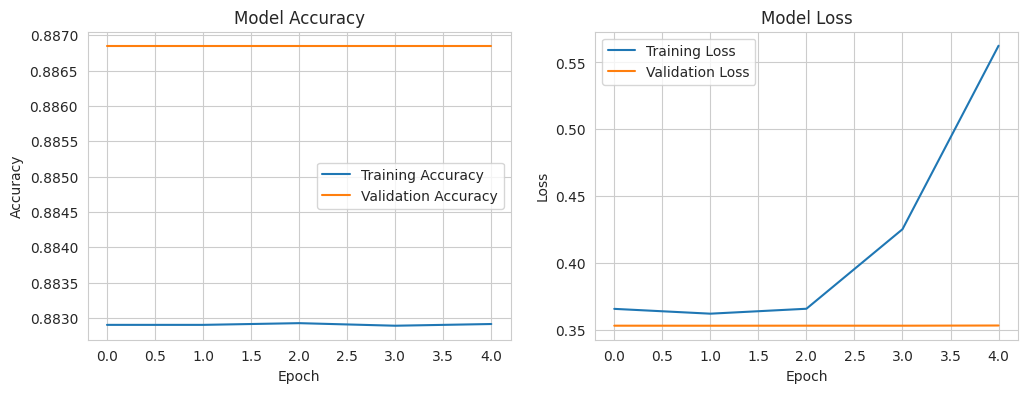

In [151]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Save the Model
Save the trained model for submission.

In [148]:
model.save('my_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

 A1 Normalization/Standardization: I used StandardScaler to ensure all features are on the same scale for better model training.
Encoding: LabelEncoder was used to convert categorical data into numerical values, which is necessary for the model.
Handling Imbalanced Data: RandomUnderSampler balanced the dataset by reducing the number of majority class samples.

A2:Architecture: I used an ANN with 1 input layer, 2 hidden layers (64 and 32 neurons), and 1 output layer. ReLU activation in hidden layers and sigmoid in the output layer were chosen to handle binary classification.

A3: Training Process

Batch Size: 32 for a balance between training speed and stability.
Epochs: 20 to ensure the model learns sufficiently without overfitting.
Optimizer: Adam with a learning rate of 0.001 for efficient training.

A4: Loss Function and Metrics

Loss Function: Binary crossentropy, suitable for binary classification.
Metrics: Accuracy to measure overall performance, with additional metrics like precision and recall for detailed insight.

A5: Regularization Techniques

Dropout: Used dropout (0.5 rate) to prevent overfitting and improve generalization.

A6: Model Evaluation

Approach: Evaluated using accuracy, confusion matrix, and classification report to understand model performance.

A7: Model Tuning

Tuning: Not extensively done, but adjustments like learning rate or layer sizes could improve performance.

A8: Overfitting and Underfitting

Analysis: The model showed signs of overfitting. Techniques like dropout were used to address it. For underfitting, increasing model complexity could be an option.